Mean squared error: 1467873979.53
MAE : 30531.95
RMSE : 38312.84
Coefficient of determination: 0.90


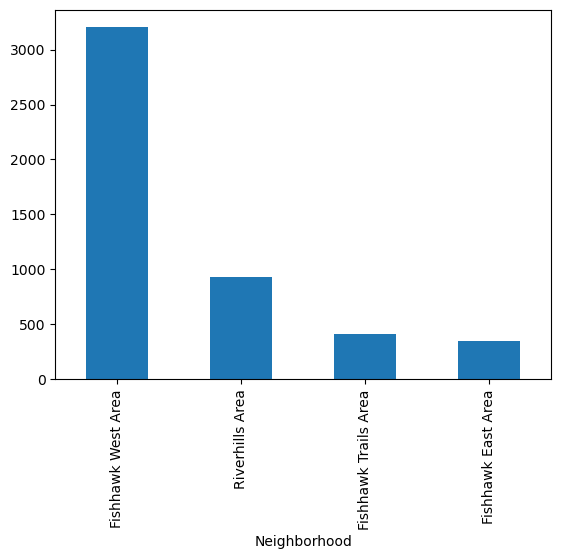

In [106]:
# Simple Practice training model - Linear Regression
from sklearn.linear_model import LinearRegression
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Used to perform the pipeline
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Dataset from class files
path = "../Programs/homes.csv"
housing_df = pd.read_csv(path)
housing_df = housing_df.loc[(housing_df.TotalLandValue > 50000) & (housing_df.LastSalePrice >= 90000) & (housing_df.TaxableValue > 50000)] # Setting restrictions to retrieve certain data

columns_to_check = ["Acreage", "TotalHeatedAreaSqFt", "TotalBedrooms", "TotalBathrooms", "TotalLandValue", "TotalBuildingValue", "LastSalePrice", "TotalGrossAreaSqFt"]
housing_df.dropna(subset=columns_to_check, inplace=True) # Drop any rows with N/A values in columns 

x = housing_df[['Acreage','TotalHeatedAreaSqFt', 'TotalBedrooms', 'TotalBathrooms', 'TotalLandValue', 'TotalBuildingValue', 'Neighborhood', 'TotalGrossAreaSqFt']] # Features in x 
y = housing_df['AssessedValue'] # Result in y

#Split data into seperate pipelines
#Numeric pipeline
num_features = ['Acreage', 'TotalHeatedAreaSqFt', 'TotalBedrooms', 'TotalBathrooms', 'TotalLandValue', 'TotalBuildingValue', 'TotalGrossAreaSqFt']
num_transformer = Pipeline(steps=[('imputer', SimpleImputer(strategy='median'))])

#Categorical pipeline
cat_features = ['Neighborhood']
cat_transformer = Pipeline(steps=[('imputer', SimpleImputer(strategy='constant', fill_value='missing')),('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(transformers=[('num', num_transformer, num_features),('cat', cat_transformer, cat_features)])

housing_model = Pipeline(steps=[('preprocessor', preprocessor),('classifier', LinearRegression(fit_intercept=True))])

# Train data with 65% of it in training
xtrain, xtest, ytrain, ytest = train_test_split(x, y, random_state=1957, train_size=0.65)

housing_model.fit(xtrain, ytrain)

y_model = housing_model.predict(xtest)

# Calculate MSE, MAE, RMSE, and Coefficent of Determination
print('Mean squared error: %.2f'% mean_squared_error(ytest, y_model))
print('MAE : %.2F'% mean_absolute_error(ytest, y_model))
print('RMSE : %.2f'% np.sqrt(mean_squared_error(ytest, y_model)))
# Determines how accurate the predictions of the training model are
print('Coefficient of determination: %.2f'% r2_score(ytest, y_model))

# Simple visualization to determine which neighborhoods comprise most of the data
housing_df["Neighborhood"].value_counts()[:4].plot(kind='bar')
plt.show()
